# Oscillation in eeg 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
time = 1/20_000 # in seconds
unit_time = 's'
start = 1 # in seconds
end = 1.01 

Text(0.5, 1.0, 'EEG signal on the first 3000 rows')

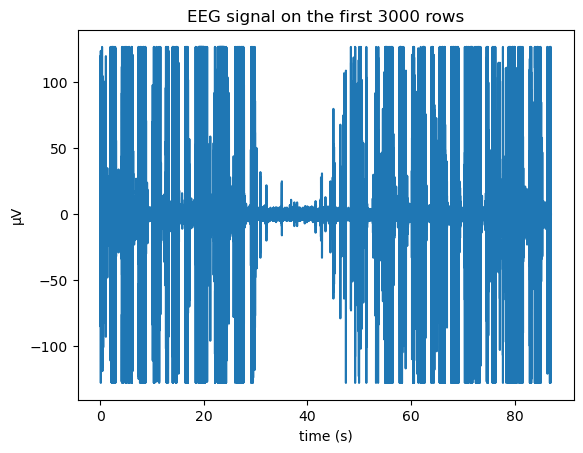

In [18]:
df = pd.read_csv('../data/EEGArchi13mPFC.txt')
# df = df.iloc[int(start*20_000):int(end*20_000)] 
df['time'] = df.index * time
df.rename(columns={'0': 'µV'}, inplace=True)
plt.plot(df['time'], df['µV'])
plt.xlabel(f'time ({unit_time})')
plt.ylabel('µV')
plt.title('EEG signal on the first 3000 rows')

## 1 Fourier transform

Text(0.5, 1.0, 'Fourier transform of the EEG signal')

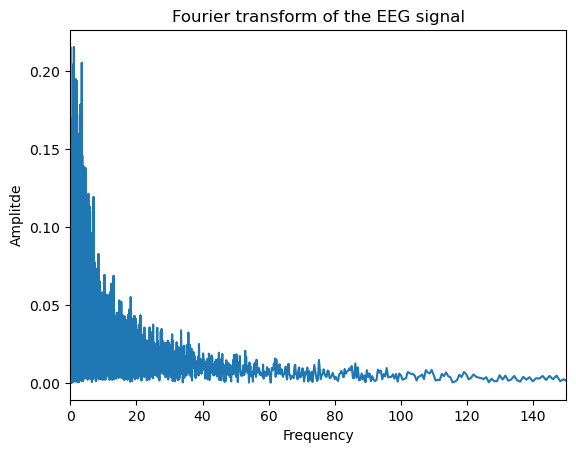

In [16]:
import scipy as sp 
import scipy.fftpack
import numpy as np

df_f = df.copy()
df_f['µV'] = sp.fftpack.fft(df_f['µV'])/len(df_f['µV'])
plt.plot(1/df_f['time'], np.abs(df_f['µV']))
plt.xlabel(f'Frequency')
plt.xlim(0, 150)
plt.ylabel('Amplitde')
plt.title('Fourier transform of the EEG signal')

- gamma = 30 Hz 
- Theta = 5-12 Hz

peut être une normalisation a faire

## Create heatmap
sur l'intervalle bio possible 